# INTRODUCTION

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Each column represents a specific attribute of the apps. Here's a brief explanation of what each column represents:
- __Pregnancies__: Number of times pregnant
- __Glucose__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- __BloodPressure__: Diastolic blood pressure (mm Hg)
- __SkinThickness__: Triceps skin fold thickness (mm)
- __Insulin__: 2-Hour serum insulin (mu U/ml)
- __BMI__: Body mass index (weight in kg/(height in m)^2)
- __DiabetesPedigreeFunction__: Diabetes pedigree function
- __Age__: Age (years)
- __Outcome__: Class variable (0 or 1), 0 means "No" & 1 means "Yes"

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Datasets\diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
291,0,107,62,30,74,36.6,0.757,25,1
50,1,103,80,11,82,19.4,0.491,22,0
392,1,131,64,14,415,23.7,0.389,21,0
288,4,96,56,17,49,20.8,0.340,26,0
398,3,82,70,0,0,21.1,0.389,25,0
293,1,128,48,45,194,40.5,0.613,24,1
542,10,90,85,32,0,34.9,0.825,56,1
696,3,169,74,19,125,29.9,0.268,31,1
762,9,89,62,0,0,22.5,0.142,33,0
189,5,139,80,35,160,31.6,0.361,25,1


In [3]:
# No. of rows & cols 
df.shape

(768, 9)

In [4]:
# Statistic measures of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check if there's any null values
df.isnull().sum().any()

False

In [6]:
# Check if there's any duplicate values
df.duplicated().sum()

0

In [7]:
# Data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

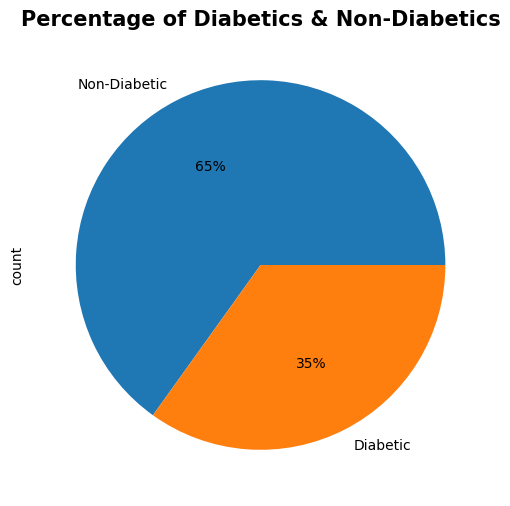

In [8]:
# Check the no. of classes
plt.figure(figsize = (5, 4))

labels = ['Non-Diabetic', 'Diabetic']
df['Outcome'].value_counts().plot(kind = 'pie', labels = labels, autopct = '%1.f%%', figsize = (6, 6))
plt.title('Percentage of Diabetics & Non-Diabetics', fontsize = 15, fontweight = 'bold')
plt.show()

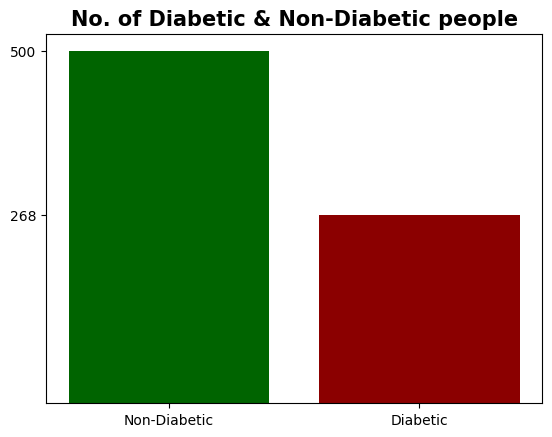

In [9]:
# Sample of Diabetic & Non-Diabetic people
count = df['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], count, color = ['darkgreen', 'darkred'])
plt.title('No. of Diabetic & Non-Diabetic people', fontsize = 15, fontweight = 'bold')
plt.yticks(count)
plt.show()

---
0 - Non Diabetic

1 - Diabetic

---

### Check Outliers

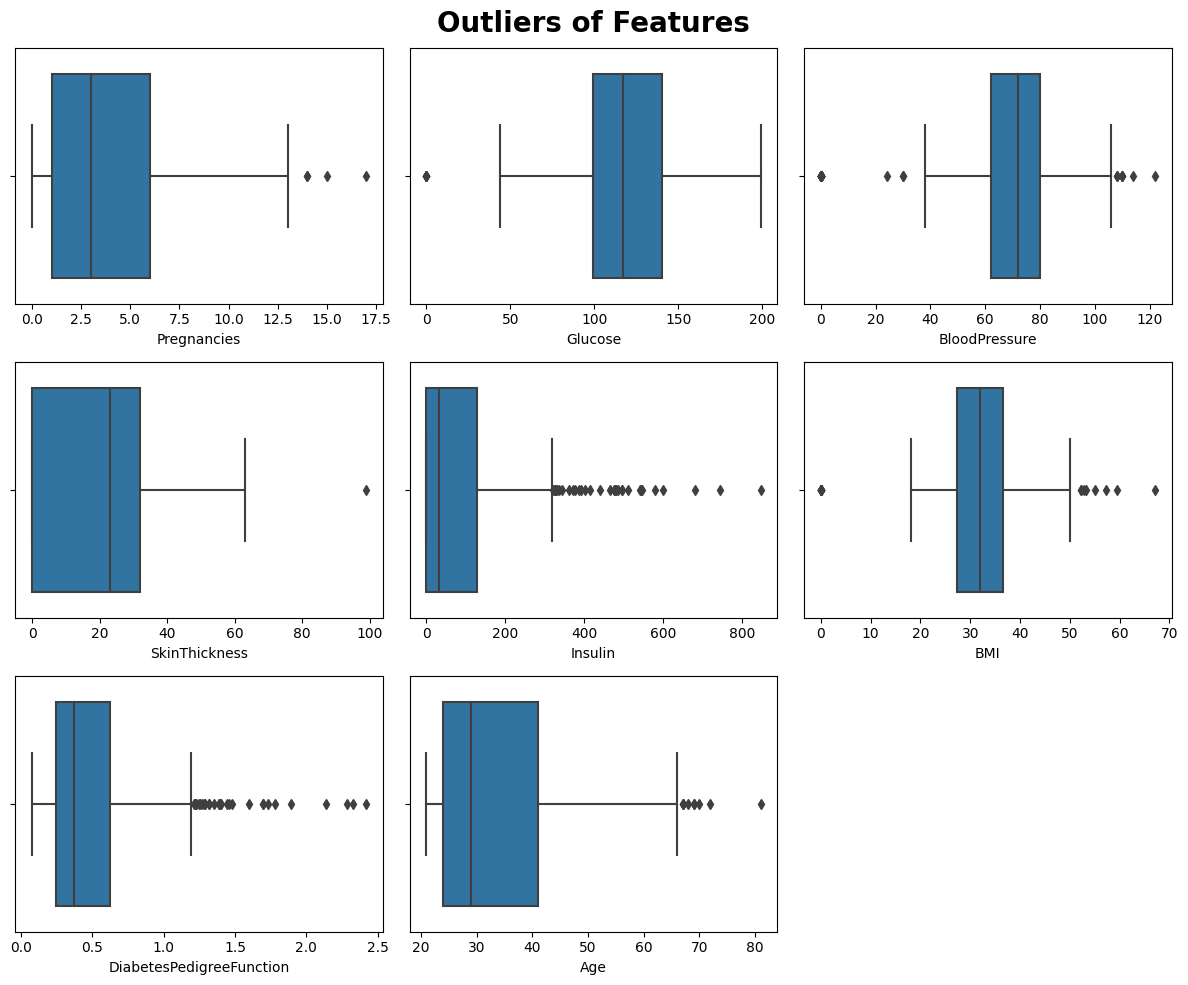

In [10]:
# Input Feature Column Names
plt.figure(figsize = (12, 10))
columns = list(df.drop('Outcome',axis = 1).columns)

for idx, col in enumerate(columns) : 
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(data = df, x = col)
plt.suptitle('Outliers of Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [11]:
# Identifying Outliers 
df[(df['Pregnancies'] > 14)]          # Pregnancies
df[(df['Glucose'] <= 0)]
df[(df['SkinThickness'] > 98)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [12]:
# Removing Outliers
df.drop([88, 159, 75, 182, 342, 349, 502, 579], inplace = True)

### Check Skewness

---
#### Rules for Skewness 
1. If found skewness in data then we try to minimise means reduced skewness using transformation method (log() or sqrt()) 
1. We will check correlation between input and output , If corr() is >= 0.5 then no need to apply transformation, even if skewness is there.
2. If skewness is -ve value of given column then dont apply transformation because log and sqrt of -ve value is null
3. If skewness is there and the correlation is not above 0.5 then we use transformation.
4. If there is skewness but negative value is also there in the record then we do not use transformation
5. If correlation is not there but skewness is there, then will apply transformation.
---

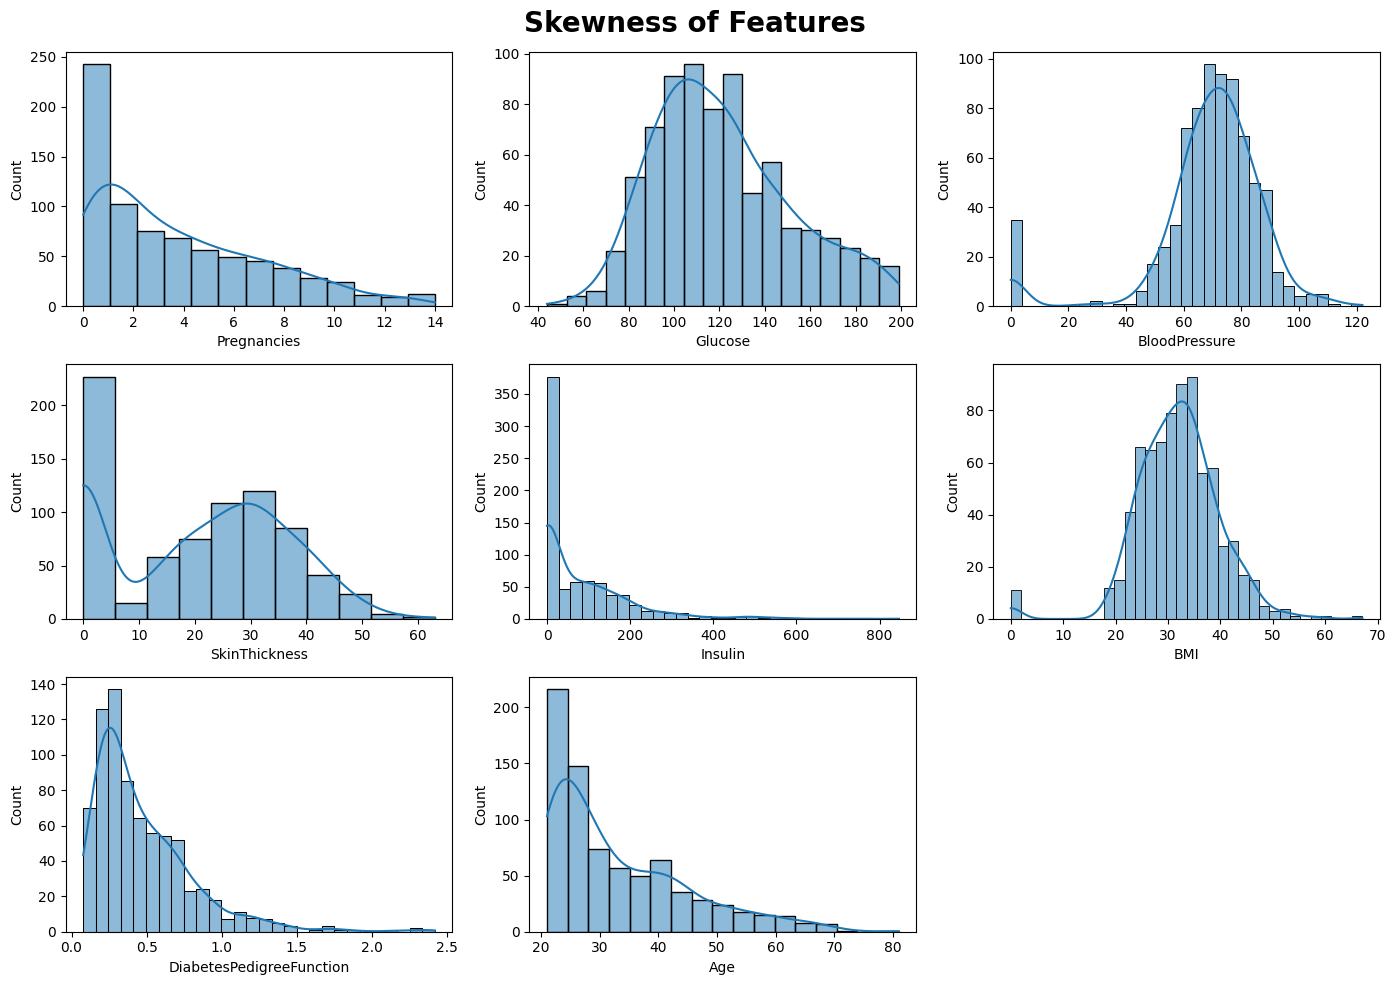

In [13]:
# To show the distribution of all the columns, where it contains Normal Distribution or Skewness

plt.figure(figsize = (14, 10))
for idx, col in enumerate(columns) : 
    plt.subplot(3, 3, idx + 1)
    sns.histplot(data = df, x = col, kde = True)
    
plt.suptitle('Skewness of Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [14]:
# To check one by one skewness according to its columns
for col in columns : 
    s = df[col].skew()
    print(f'{col} : {s} ')
    
# Skewness should be very less

Pregnancies : 0.8415721152962159 
Glucose : 0.5321365677848525 
BloodPressure : -1.8389284857209656 
SkinThickness : -0.017402282986984284 
Insulin : 2.261794329179115 
BMI : -0.4243495421618069 
DiabetesPedigreeFunction : 1.9223878303023008 
Age : 1.1403232420313438 


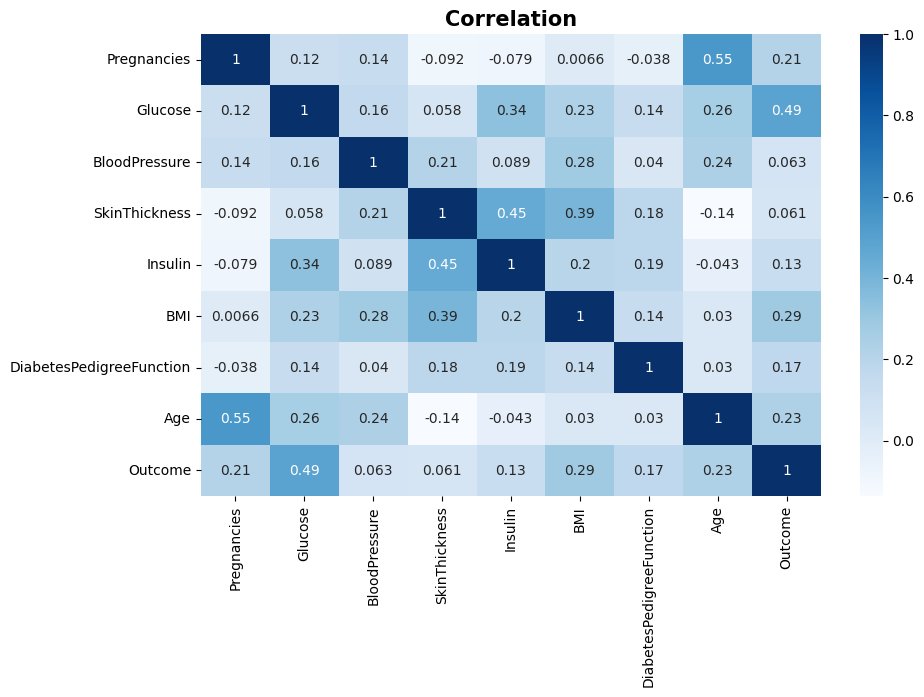

In [15]:
# Check Correlation

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title("Correlation", fontsize = 15, fontweight = 'bold')
plt.show()

In [16]:
# Check either negative value is there in the column
for col in columns : 
    print(any(df[col].unique() < 0))  

False
False
False
False
False
False
False
False


---
- The correlation for any variable is not above 0.5.
- Negative Skewness are : BloodPressure, SkinThickness, BMI 
---

In [17]:
# Apply log() transformation on the skewed columns to reduce skewness

skew_cols = ['DiabetesPedigreeFunction', 'Age']
for col in skew_cols : 
    df[col] = np.log(df[col])

In [18]:
# Re-check the skewness 

for col in columns : 
    s = df[col].skew()
    print(f'{col} : {s}')

Pregnancies : 0.8415721152962159
Glucose : 0.5321365677848525
BloodPressure : -1.8389284857209656
SkinThickness : -0.017402282986984284
Insulin : 2.261794329179115
BMI : -0.4243495421618069
DiabetesPedigreeFunction : 0.11761521927173027
Age : 0.6105819451748805


### Standardization - Standard Scaling

In [19]:
#Select Input Features and Output Target from the dataset 
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

In [20]:
# Use Standard Scaling on the data
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler class
scaler = StandardScaler()
X = scaler.fit_transform(X)    # Applying scaling on Input Features

# fit means to change and then apply

In [21]:
#Split the data into 70% and 30%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(608, 8) (152, 8) (608,) (152,)


### Create Baseline Model

In [23]:
#Create a user defined function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Markdown

class_labels = ['Non-Diabetic', 'Diabetic']

def create_model (model) : 
    model.fit(X_train, Y_train)                           # Train the data
    Y_pred = model.predict(X_test)                        # Test / Predict the data
    print(classification_report(Y_test, Y_pred))          # Performance Report
    conf_matrix = confusion_matrix(Y_test, Y_pred)        # Performance Matrix
    sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', 
                xticklabels = class_labels, yticklabels = class_labels)
    plt.xlabel("Predicted Values", fontsize = 12)
    plt.ylabel("Actual Values", fontsize = 12)
    plt.show()
    
    # Print the Accuracy of the model
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    display(Markdown(f"<h4>Accuracy : {accuracy}%</h4>"))
    return model

### Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



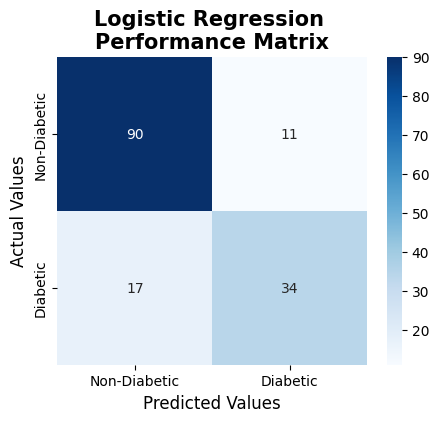

<h4>Accuracy : 81.58%</h4>

In [24]:
from sklearn.linear_model import LogisticRegression

# Create object of LogisticRegression class
lr = LogisticRegression()

plt.figure(figsize = (5, 4))
plt.title("Logistic Regression \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
lr = create_model(lr)         # Call function

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       101
           1       0.63      0.67      0.65        51

    accuracy                           0.76       152
   macro avg       0.73      0.73      0.73       152
weighted avg       0.76      0.76      0.76       152



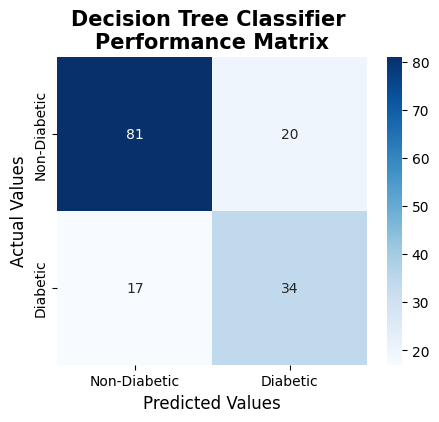

<h4>Accuracy : 75.66%</h4>

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Create object of DecisionTreeClassifier class
dt = DecisionTreeClassifier()      # by default gini index : 1 - P ^ 2 - Q ^ 2

plt.figure(figsize = (5, 4))
plt.title("Decision Tree Classifier \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
dt = create_model(dt)         # Call function

In [26]:
# Input Feature Column Names
cols = list(df.drop('Outcome',axis = 1).columns)

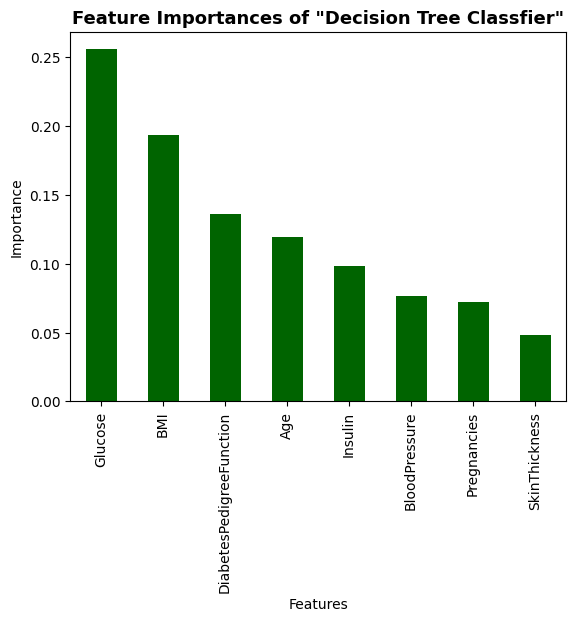

In [27]:
#To check the importances of every features
pd.Series(dt.feature_importances_, index = cols).sort_values(ascending = False).plot(kind = 'bar', color = 'darkgreen')
plt.title('Feature Importances of "Decision Tree Classfier"', fontsize = 13, fontweight = 'bold')
plt.xlabel('Features', fontsize = 10) 
plt.ylabel('Importance', fontsize = 10)
plt.show()

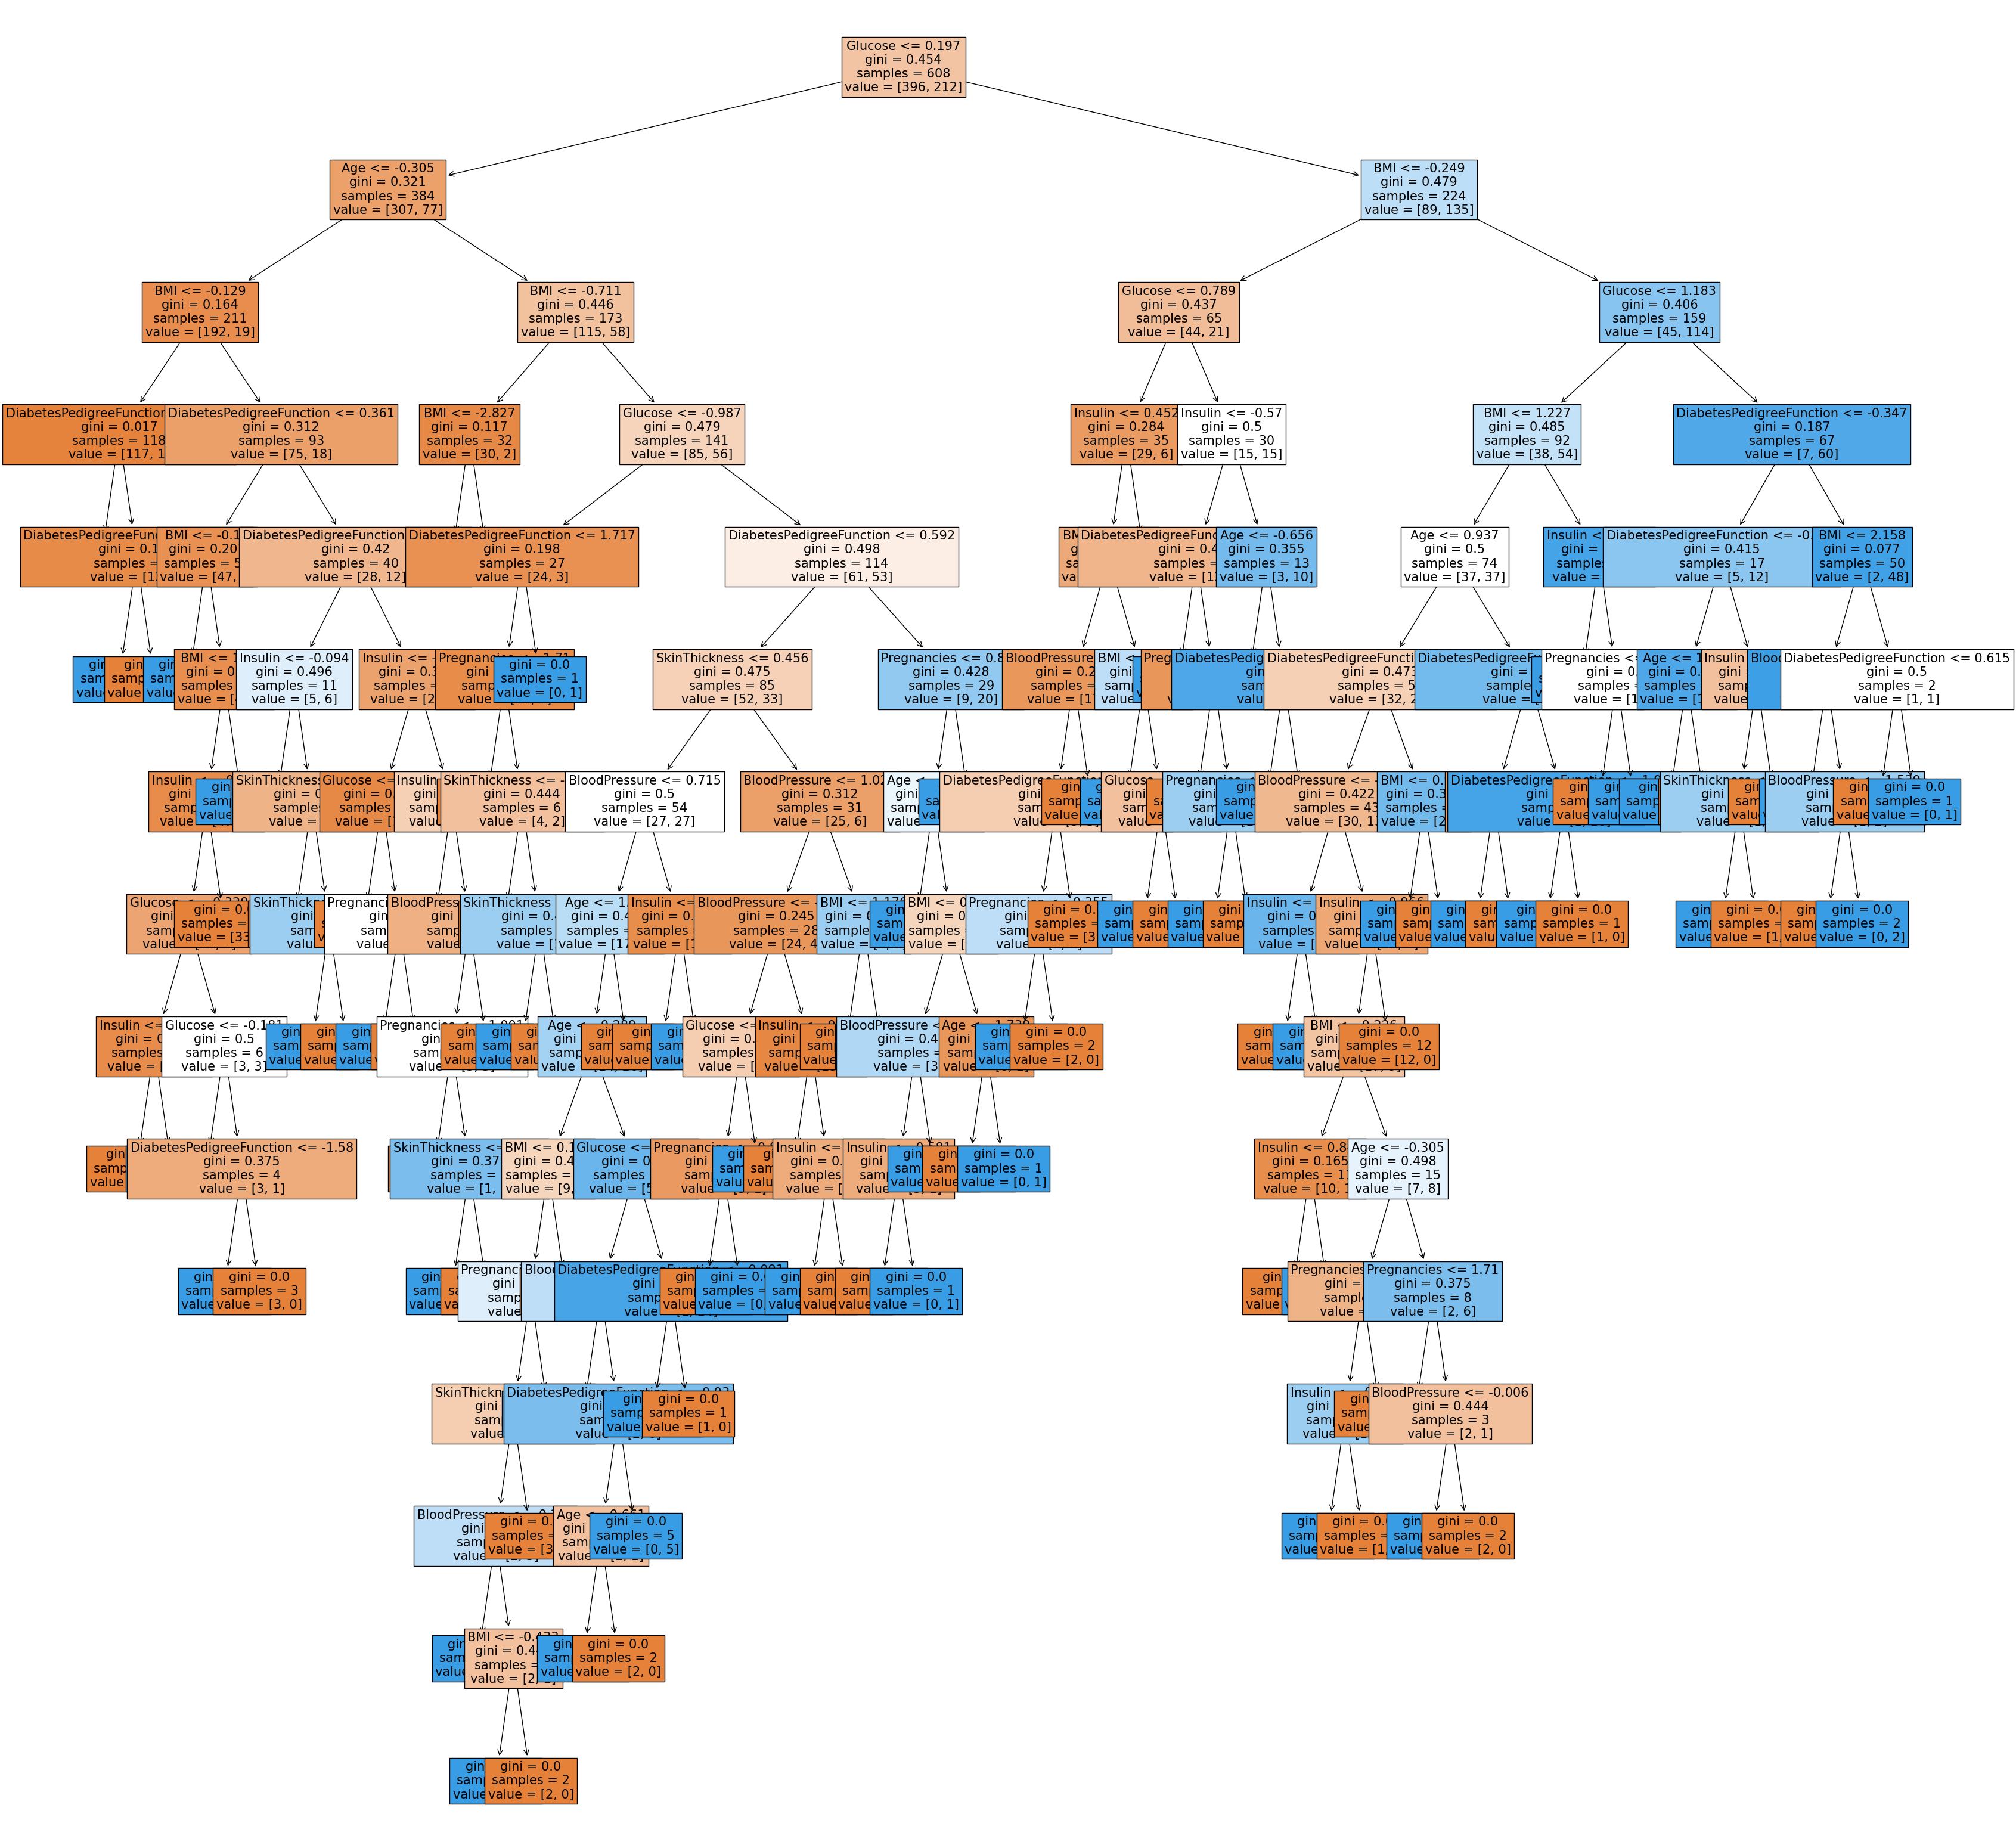

In [28]:
# Create a decision tree
from sklearn import tree

fig = plt.figure(figsize = (40, 40))
_ = tree.plot_tree(dt, feature_names = cols, filled = True, fontsize = 15)

---
- Here, "Glucose" is the most information feature
- But, biggest disadvantage of Decision Tree is that it causes Overfitting situation, because it doesn't remove less important features, instead it keeps them.
- So will use Pruning Technique to reduce overfitting problem
---

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       101
           1       0.71      0.43      0.54        51

    accuracy                           0.75       152
   macro avg       0.74      0.67      0.68       152
weighted avg       0.74      0.75      0.73       152



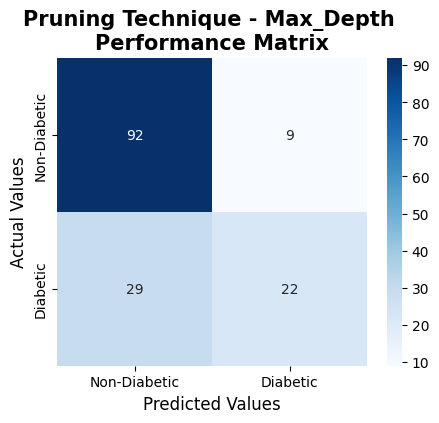

<h4>Accuracy : 75.0%</h4>

In [29]:
# Apply pruning technique to reduce overfitting of entropy method
# There are 2 types of pruninig tech : max_depth and min_samples_leaf
dt_pruning_max = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 1)

plt.figure(figsize = (5, 4))
plt.title("Pruning Technique - Max_Depth \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
dt_pruning_max = create_model(dt_pruning_max)         # Call function

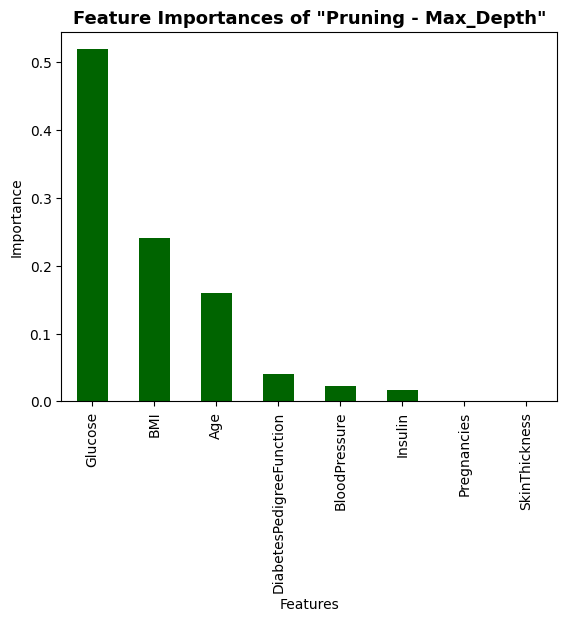

In [30]:
# To check the importances of every features
pd.Series(dt_pruning_max.feature_importances_, index = cols).sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                 color = 'darkgreen')
plt.title('Feature Importances of "Pruning - Max_Depth"', fontsize = 13, fontweight = 'bold')
plt.xlabel('Features', fontsize = 10) 
plt.ylabel('Importance', fontsize = 10)
plt.show()

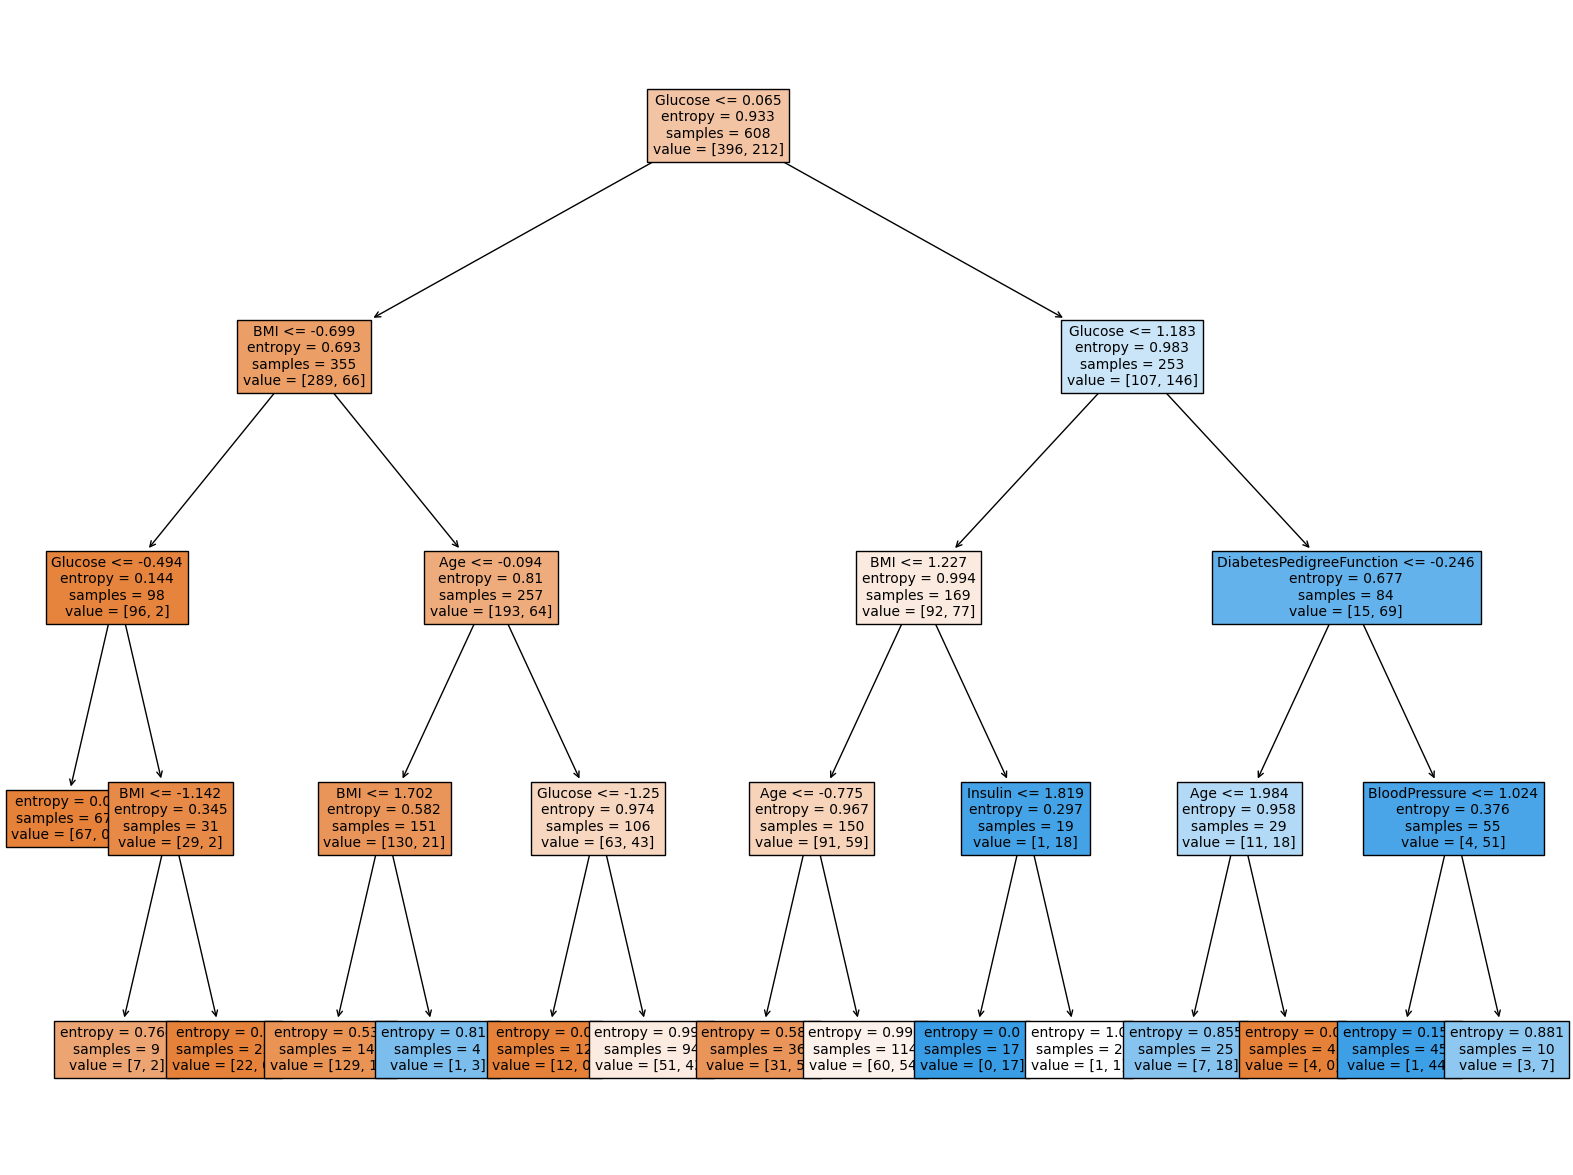

In [31]:
# Create a decision tree

fig = plt.figure(figsize = (20, 15))
_ = tree.plot_tree(dt_pruning_max, feature_names = cols, filled = True, fontsize = 10)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       101
           1       0.60      0.59      0.59        51

    accuracy                           0.73       152
   macro avg       0.70      0.70      0.70       152
weighted avg       0.73      0.73      0.73       152



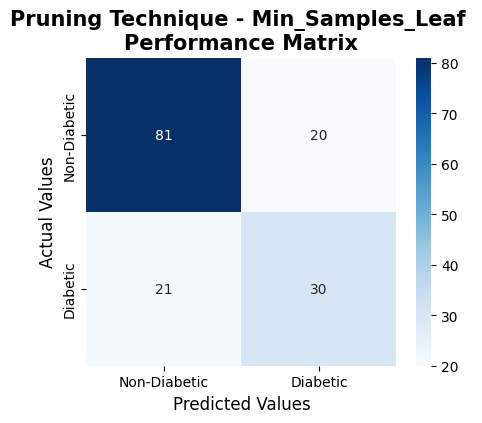

<h4>Accuracy : 73.03%</h4>

In [32]:
# Apply min_samples_leaf of Pruning technique
dt_pruning_min = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50, random_state = 1)

plt.figure(figsize = (5, 4))
plt.title("Pruning Technique - Min_Samples_Leaf \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
dt_pruning_min = create_model(dt_pruning_min)         # Call function

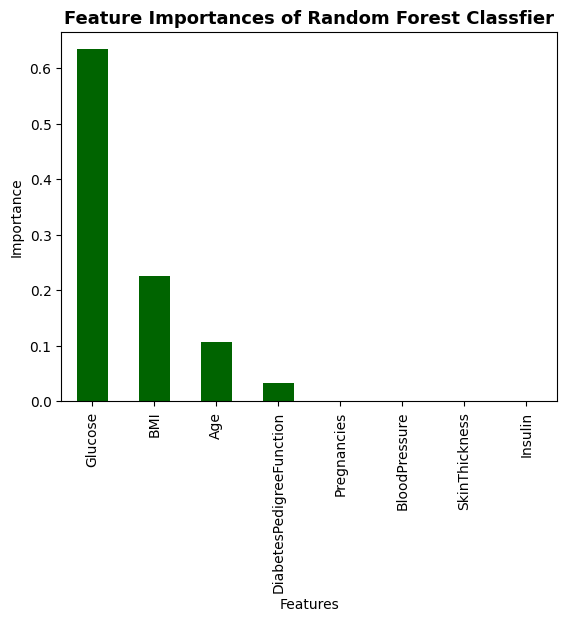

In [33]:
# To check the importances of every features

pd.Series(dt_pruning_min.feature_importances_, index = cols).sort_values(ascending = False).plot(kind = 'bar', color = 'darkgreen')
plt.title('Feature Importances of Random Forest Classfier', fontsize = 13, fontweight = 'bold')
plt.xlabel('Features', fontsize = 10) 
plt.ylabel('Importance', fontsize = 10)
plt.show()

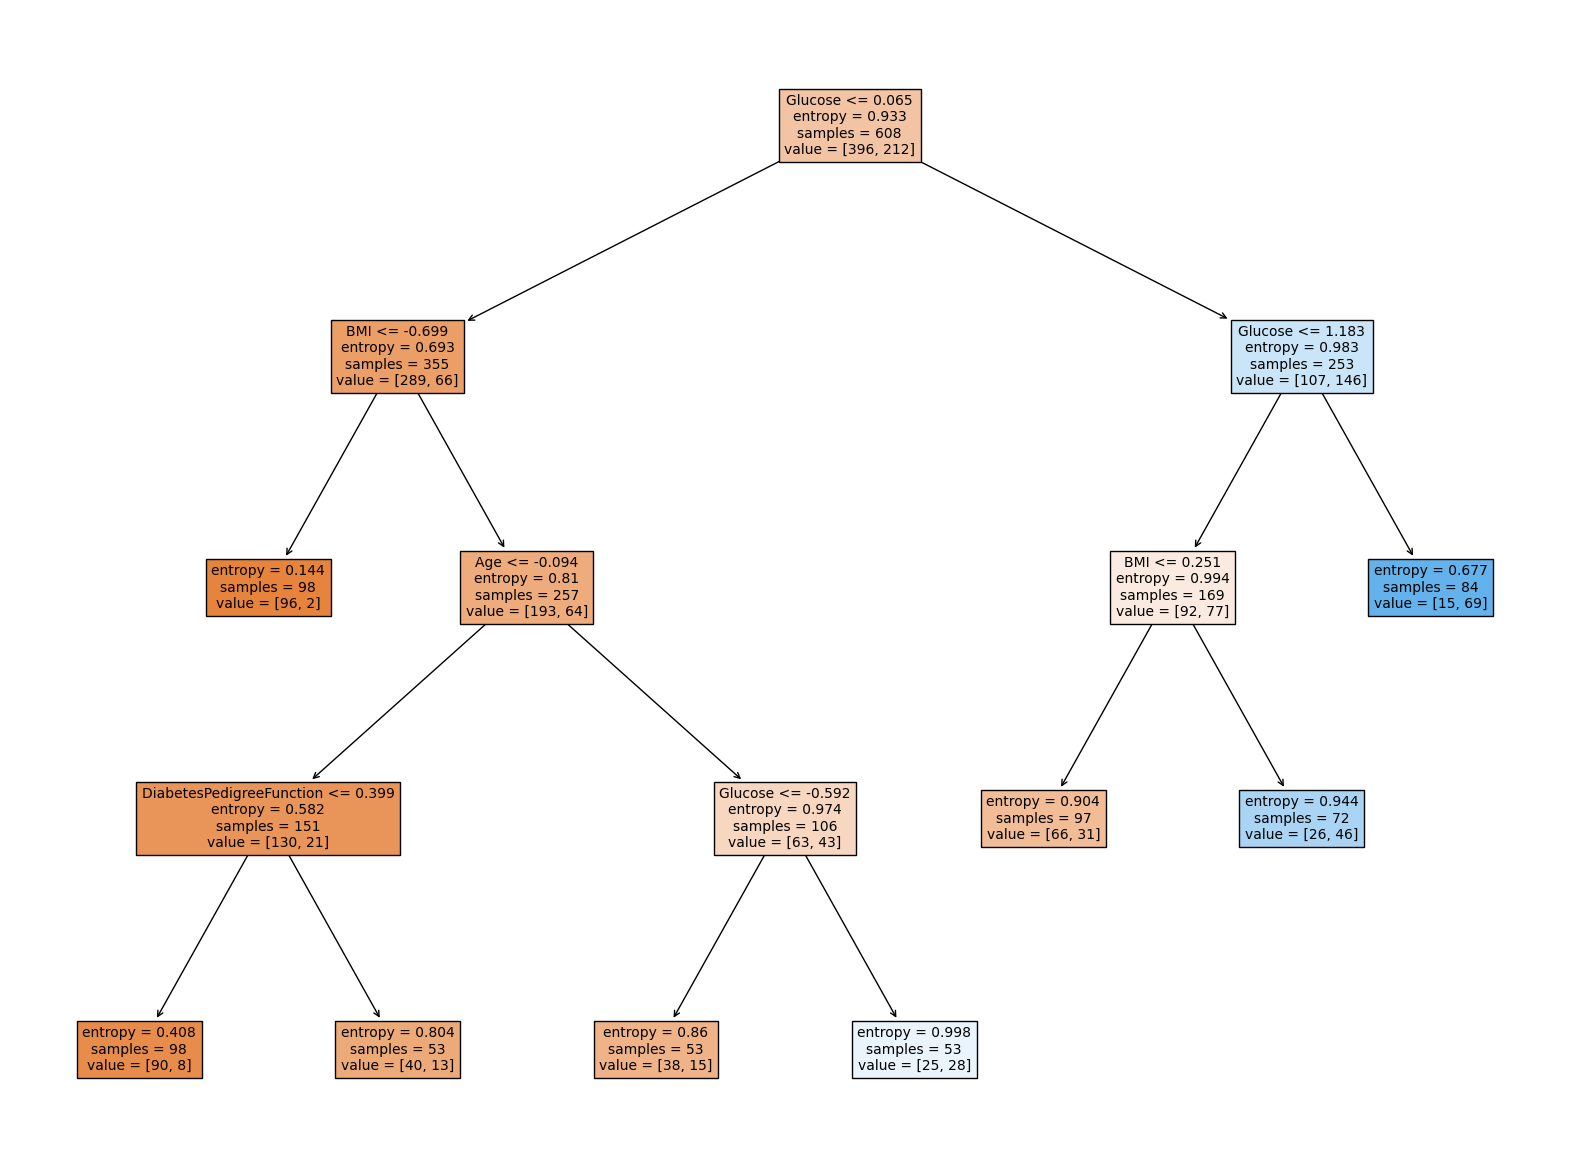

In [34]:
# Create a decision tree

fig = plt.figure(figsize = (20, 15))
_ = tree.plot_tree(dt_pruning_min, feature_names = cols, filled = True, fontsize = 10)

---
- Here, Glucose, BMI & Age feature are important
---

# Ensembling Technique

### Random Forest Classifier

In [35]:
# Random Forest Tree mostly prefer Bagging technique
from sklearn.ensemble import RandomForestClassifier

#Create object of RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators = 10, max_features = 2, random_state = 1)
# here, n_estimator no. of decisiontrees we take
# max_feature means no. of inputs 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       101
           1       0.67      0.59      0.62        51

    accuracy                           0.76       152
   macro avg       0.74      0.72      0.73       152
weighted avg       0.76      0.76      0.76       152



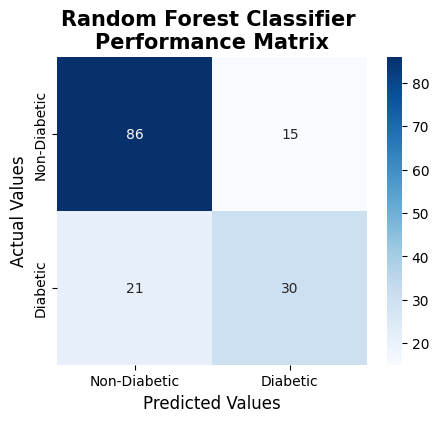

<h4>Accuracy : 76.32%</h4>

In [36]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("Random Forest Classifier \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
rfc = create_model(rfc)        

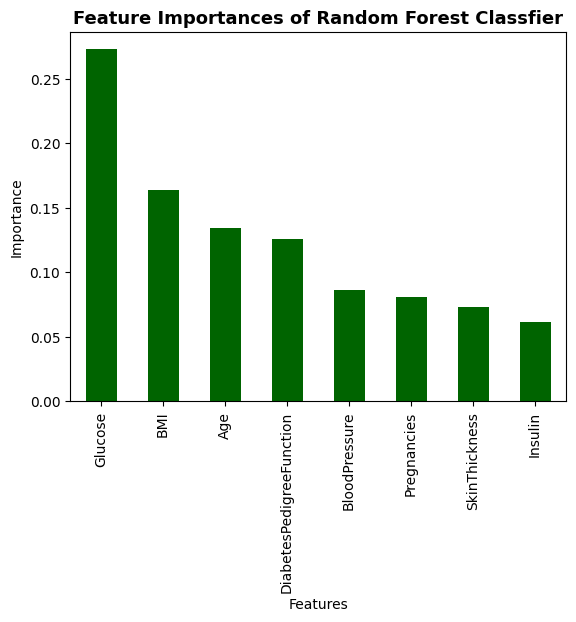

In [37]:
pd.Series(rfc.feature_importances_, index = cols).sort_values(ascending = False).plot(kind = 'bar', color = 'darkgreen')
plt.title('Feature Importances of Random Forest Classfier', fontsize = 13, fontweight = 'bold')
plt.xlabel('Features', fontsize = 10) 
plt.ylabel('Importance', fontsize = 10)
plt.show()

### Ada Boost Classifier

In [38]:
#Apply ADA Boost on the given dataset 
from sklearn.ensemble import AdaBoostClassifier

#Create object of AdaBoostCLassifier class
ada = AdaBoostClassifier(n_estimators = 7, random_state = 1)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       101
           1       0.69      0.75      0.72        51

    accuracy                           0.80       152
   macro avg       0.78      0.79      0.78       152
weighted avg       0.81      0.80      0.80       152



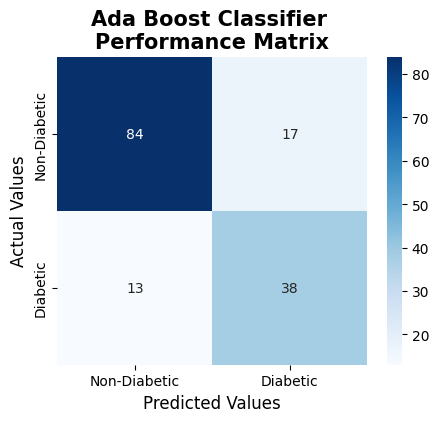

<h4>Accuracy : 80.26%</h4>

In [39]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("Ada Boost Classifier \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
ada = create_model(ada)        

### Gradient Boosting 

In [40]:
# Apply GradientBoostingClassifier on the given dataset
from sklearn.ensemble import GradientBoostingClassifier

#Create object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators = 5, random_state = 1)

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       101
           1       0.75      0.18      0.29        51

    accuracy                           0.70       152
   macro avg       0.72      0.57      0.55       152
weighted avg       0.72      0.70      0.64       152



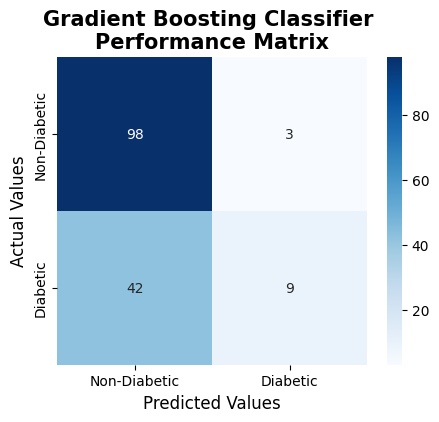

<h4>Accuracy : 70.39%</h4>

In [41]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("Gradient Boosting Classifier \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
gbc = create_model(gbc)        

### Extreme Gradient Boosting

In [42]:
# Apply XGBClassifier on the given dataset
from xgboost import XGBClassifier

#Create object of XGBClassifier class
xgb = XGBClassifier(n_estimators = 5, reg_alpha = 1, random_forest = 1)

# 'reg' means reguralisation and 'alpha' means lambda : hyperparameter, and '1' means True

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



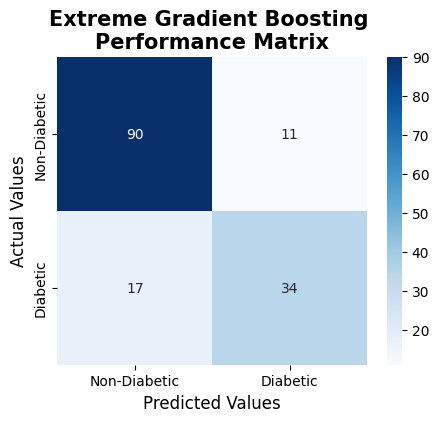

<h4>Accuracy : 81.58%</h4>

In [43]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("Extreme Gradient Boosting \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
xgb = create_model(xgb)        

### K-Nearest Neighbor (KNN)

In [44]:
# Apply KNeighborsClassifier on the given dataset
from sklearn.neighbors import KNeighborsClassifier

#Create object of KNeighborsClassifier class
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)

# 'K' means it selects the distance between 2 points
# metric decides the difference between both the data
# p = 2 'means' Euclidean Metric means sqr_root(X2 - X1) ** 2 + (Y2 - Y1) ** 2 --> (observed value - actual value)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



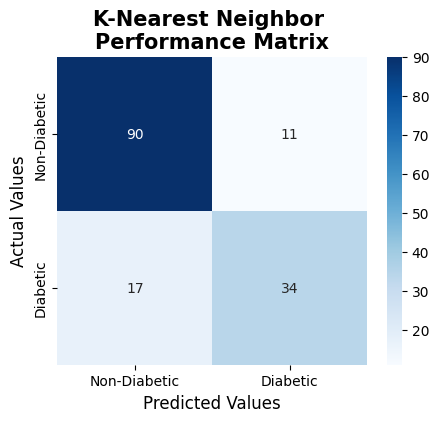

<h4>Accuracy : 81.58%</h4>

In [45]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("K-Nearest Neighbor \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
xgb = create_model(xgb)        

### Support Vector Machine

In [46]:
# Apply LinearSVC on the given dataset
from sklearn.svm import LinearSVC

#Create object of LinearSVC class
svc = LinearSVC(random_state = 1)
# by default it is hard margin means we did not added error 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



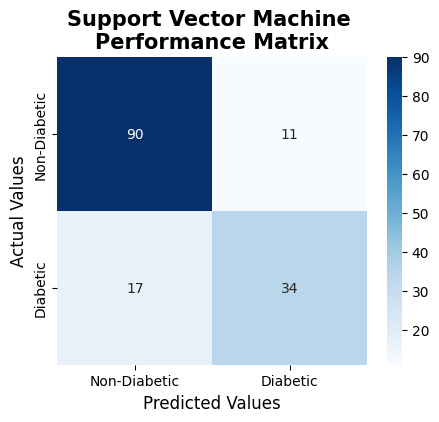

<h4>Accuracy : 81.58%</h4>

In [47]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("Support Vector Machine \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
xgb = create_model(xgb)        

In [48]:
# It can be possible, that the dataset is non-linear 
# Use Non-linear kernal function of SVM means 2 classes are not separatable with straight line
from sklearn.svm import SVC

#Create object of SVC class (for polynomial)
poly_svc = SVC(random_state = 1, kernel = 'poly')

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



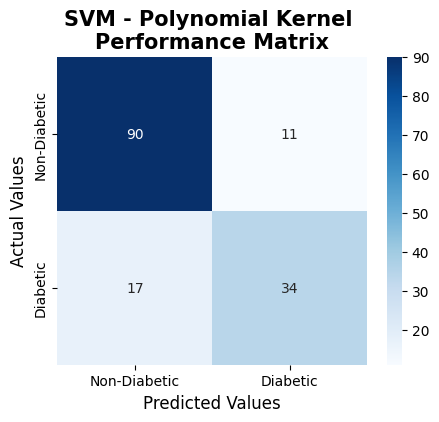

<h4>Accuracy : 81.58%</h4>

In [49]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("SVM - Polynomial Kernel \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
xgb = create_model(xgb)        

In [50]:
# Create object of SVC class (for radial basis kernel function)
radial_svc = SVC(random_state = 1, kernel = 'rbf')    # 'rbf' means radial basis function

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       101
           1       0.76      0.67      0.71        51

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152



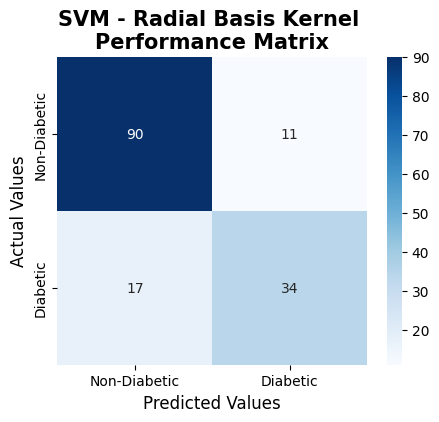

<h4>Accuracy : 81.58%</h4>

In [51]:
# Call function

plt.figure(figsize = (5, 4))
plt.title("SVM - Radial Basis Kernel \nPerformance Matrix", fontsize = 15, fontweight = 'bold')
xgb = create_model(xgb)        

# Conclusion

- No null or duplicate values are there in the dataset
- Types of data are Numerics only
- Number of Non-Diabetic people are 500 (65%), and number of Diabetic people are 268 (35%)
--- 